In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import warnings
warnings.filterwarnings("ignore")

In [ ]:
#Load Data Set
original_data = pd.read_csv("https://raw.githubusercontent.com/renatomaaliw3/public_files/master/Data%20Sets/Iris%20(4).csv")
original_data.head(5)


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
original_data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          8
dtype: int64

In [ ]:
#Dropping the column 'Id'

cleaned_data = original_data.drop('Id',axis = 1)
cleaned_data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
153,5.7,2.8,4.1,1.3,NaN
154,5.9,3.0,5.1,1.8,NaN
155,6.4,3.2,5.3,2.3,NaN
156,6.9,3.1,5.1,2.3,NaN


In [ ]:
cleaned_data.groupby('Species').mean()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


In [ ]:
# Replace the missing 'Species' of data 150 to 157 from your corresponding analysis

cleaned_data.at[150, 'Species'] = 'Iris-setosa'
cleaned_data.at[151, 'Species'] = 'Iris-setosa'
cleaned_data.at[152, 'Species'] = 'Iris-versicolor'
cleaned_data.at[153, 'Species'] = 'Iris-versicolor'
cleaned_data.at[154, 'Species'] = 'Iris-virginica'
cleaned_data.at[155, 'Species'] = 'Iris-virginica'
cleaned_data.at[156, 'Species'] = 'Iris-virginica'
cleaned_data.at[157, 'Species'] = 'Iris-setosa'

In [ ]:
#Check if the last columns is not included

cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  158 non-null    float64
 1   SepalWidthCm   158 non-null    float64
 2   PetalLengthCm  158 non-null    float64
 3   PetalWidthCm   158 non-null    float64
 4   Species        158 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.3+ KB


In [ ]:
#check again the data to make sure it is already clean

cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  158 non-null    float64
 1   SepalWidthCm   158 non-null    float64
 2   PetalLengthCm  158 non-null    float64
 3   PetalWidthCm   158 non-null    float64
 4   Species        158 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.3+ KB


In [ ]:
#Check the target classes
cleaned_data['Species'].unique()


array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
#You can resolve the issue by resetting the index again
cleaned_data = cleaned_data.reset_index().drop('index', axis = 1)
cleaned_data.tail(12)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica
150,5.3,3.7,1.5,0.2,Iris-setosa
151,5.0,3.3,1.4,0.2,Iris-setosa
152,5.1,2.5,3.0,1.1,Iris-versicolor
153,5.7,2.8,4.1,1.3,Iris-versicolor
154,5.9,3.0,5.1,1.8,Iris-virginica
155,6.4,3.2,5.3,2.3,Iris-virginica


In [ ]:
X = cleaned_data.drop('Species', axis = 1)
scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

In [ ]:
#Scale teh data using scaler transform
scaled_features = scaler.transform(X)
scaled_features

array([[-0.89687481,  1.03904833, -1.3304173 , -1.30308113],
       [-1.14119588, -0.13025107, -1.3304173 , -1.30308113],
       [-1.38551694,  0.33746869, -1.38733741, -1.30308113],
       [-1.50767748,  0.10360881, -1.2734972 , -1.30308113],
       [-1.01903534,  1.27290821, -1.3304173 , -1.30308113],
       [-0.53039321,  1.97448785, -1.159657  , -1.04180344],
       [-1.50767748,  0.80518845, -1.3304173 , -1.17244229],
       [-1.01903534,  0.80518845, -1.2734972 , -1.30308113],
       [-1.75199855, -0.36411095, -1.3304173 , -1.30308113],
       [-1.14119588,  0.10360881, -1.2734972 , -1.43371998],
       [-0.53039321,  1.50676809, -1.2734972 , -1.30308113],
       [-1.26335641,  0.80518845, -1.2165771 , -1.30308113],
       [-1.26335641, -0.13025107, -1.3304173 , -1.43371998],
       [-1.87415908, -0.13025107, -1.50117761, -1.43371998],
       [-0.04175107,  2.20834774, -1.44425751, -1.30308113],
       [-0.1639116 ,  3.14378726, -1.2734972 , -1.04180344],
       [-0.53039321,  1.

In [ ]:
#Convert the scaled features back to a DataFrame
scaled_features = pd.DataFrame(scaled_features, columns = cleaned_data.columns[1:])
scaled_features.head(5)

,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,-0.896875,1.039048,-1.330417,-1.303081
1,-1.141196,-0.130251,-1.330417,-1.303081
2,-1.385517,0.337469,-1.387337,-1.303081
3,-1.507677,0.103609,-1.273497,-1.303081
4,-1.019035,1.272908,-1.330417,-1.303081


In [ ]:
#Set X (features) and y (Class Target)

X = scaled_features.iloc[:158,:]
y = cleaned_data.iloc[:158, -1]

In [ ]:
#Show
X

,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,-0.896875,1.039048,-1.330417,-1.303081
1,-1.141196,-0.130251,-1.330417,-1.303081
2,-1.385517,0.337469,-1.387337,-1.303081
3,-1.507677,0.103609,-1.273497,-1.303081
4,-1.019035,1.272908,-1.330417,-1.303081
...,...,...,...,...
153,-0.163912,-0.597971,0.206425,0.133946
154,0.080409,-0.130251,0.775626,0.787140
155,0.691212,0.337469,0.889467,1.440335
156,1.302015,0.103609,0.775626,1.440335


In [ ]:
#Show y
y

0          Iris-setosa
1          Iris-setosa
2          Iris-setosa
3          Iris-setosa
4          Iris-setosa
            ...       
153    Iris-versicolor
154     Iris-virginica
155     Iris-virginica
156     Iris-virginica
157        Iris-setosa
Name: Species, Length: 158, dtype: object

In [ ]:
#Train - Test Split Proper

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

In [ ]:
#Show X_train
X_train

,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
65,1.057694,0.103609,0.377186,0.264585
100,0.569052,0.571329,1.287907,1.701612
67,-0.041751,-0.831831,0.206425,-0.257970
21,-0.896875,1.506768,-1.273497,-1.041803
22,-1.507677,1.272908,-1.558098,-1.303081
...,...,...,...,...
63,0.324731,-0.364111,0.547946,0.264585
70,0.080409,0.337469,0.604866,0.787140
81,-0.408233,-1.533410,-0.021255,-0.257970
11,-1.263356,0.805188,-1.216577,-1.303081


In [ ]:
#Show
y_train

65     Iris-versicolor
100     Iris-virginica
67     Iris-versicolor
21         Iris-setosa
22         Iris-setosa
            ...       
63     Iris-versicolor
70     Iris-versicolor
81     Iris-versicolor
11         Iris-setosa
95     Iris-versicolor
Name: Species, Length: 110, dtype: object

In [ ]:
#Create a Support Vector Machine Classifier

model = SVC()
model.fit(X_train, y_train)

SVC()

In [ ]:
#Predict on X_Test
predictions = model.predict(X_test)
predictions

array(['Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-setosa', 'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa'], dtype=object)

[Text(0.5, 1.0, ' Confusion Matrix')]

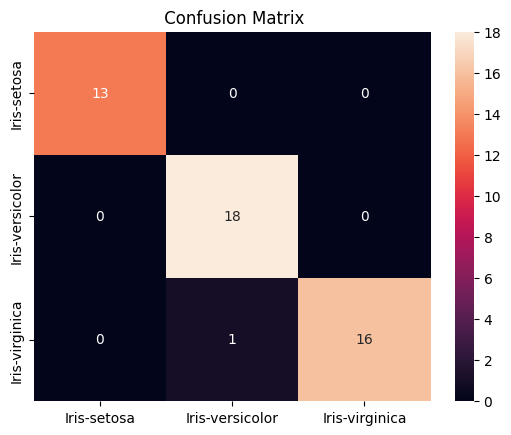

In [ ]:
#Confusion Matrix

cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot = True, fmt = 'd',
             xticklabels = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],
            yticklabels = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']).set(title = ' Confusion Matrix')

In [ ]:
#Classification Report
print(classification_report(y_test, predictions))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       0.95      1.00      0.97        18
 Iris-virginica       1.00      0.94      0.97        17

       accuracy                           0.98        48
      macro avg       0.98      0.98      0.98        48
   weighted avg       0.98      0.98      0.98        48



In [ ]:
#Can the model be improved using Grid Search?

from sklearn.model_selection import GridSearchCV
svm = SVC()
param_grid = {'C': [0.01, 0.05, 0.1, 0.5, 1, 1.5], 'kernel': ['linear', 'rbf', 'poly']}
grid = GridSearchCV(svm, param_grid)
grid.fit(X,y)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.05, 0.1, 0.5, 1, 1.5],
                         'kernel': ['linear', 'rbf', 'poly']})

In [ ]:
#Identify the Best Hyperparameters
grid.best_params_

{'C': 0.5, 'kernel': 'linear'}

In [ ]:
#Based on the Identified best_params_ -> remodel the SVM and supply the best hyperparameters
#Create another instance of Support Vector Machine Classifier
model = SVC(kernel = 'linear', C = 0.5)
model.fit(X_train, y_train)

SVC(C=0.5, kernel='linear')

In [ ]:
#Predict on X_test again
predictions = model.predict(X_test)
predictions

array(['Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-setosa', 'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa'], dtype=object)

[Text(0.5, 1.0, ' Confusion Matrix')]

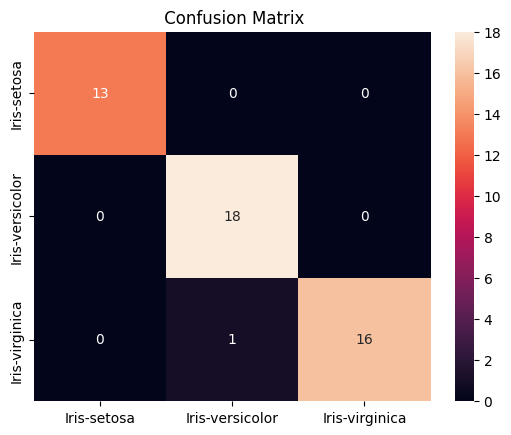

In [ ]:
#Confusion Matrix

cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot = True, fmt = 'd',
             xticklabels = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],
            yticklabels = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']).set(title = ' Confusion Matrix')

In [ ]:

print(classification_report(y_test, predictions))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       0.95      1.00      0.97        18
 Iris-virginica       1.00      0.94      0.97        17

       accuracy                           0.98        48
      macro avg       0.98      0.98      0.98        48
   weighted avg       0.98      0.98      0.98        48

